In [61]:
import numpy as np
import pandas as pd

In [62]:
data = pd.read_csv('cleaned.csv')

In [63]:
# Categories of sports

# Athleticism - Intense events requiring the most elite levels of individual speed, endurance, strength and flexibility 
athletic_sports = ['Athletics','Swimming','Biathlon','Gymnastics','Weightlifting','Cycling','Triathlon', \
                  'Rowing','Modern Pentathlon', 'Diving','Synchronized Swimming', 'Rhythmic Gymnastics', \
                    'Canoeing','Trampolining', 'Alpinism'  ]

# One vs Other combative sports which require physical strength, skill and endurance
combative_sports = ['Judo','Wrestling','Fencing','Boxing', 'Taekwondo', 'Tug-Of-War']

# Mostly team events where there is a ball or disk or an object of interest and an elaborate set of rules for play
# Requires special game based skills along with physical fitness
ball_based_sports = ['Basketball','Football','Ice Hockey','Handball','Water Polo','Hockey','Volleyball','Baseball',\
              'Rugby','Polo', 'Cricket',  'Softball', 'Rugby Sevens' ,'Badminton','Tennis','Table Tennis', 'Racquets', \
              'Lacrosse','Jeu De Paume','Basque Pelota','Beach Volleyball' ]
   
# Events where fitness levels matter but special maneuvering skills (with/without special equipments) matter the most 
other_sports = ['Art Competitions','Shooting', 'Archery', 'Curling','Equestrianism', 'Luge', 'Bobsleigh', 'Speed Skating', \
                'Cross Country Skiing','Sailing','Short Track Speed Skating','Figure Skating','Ski Jumping'  \
                ,'Nordic Combined', 'Snowboarding','Alpine Skiing','Freestyle Skiing', 'Skeleton', 'Motorboating', \
                  'Military Ski Patrol','Golf','Croquet','Roque', 'Aeronautics' ]

In [64]:
# Adding the category variable

def get_category(row):
  sport = row['Sport']
  if sport in athletic_sports:
    return 'Athletic'
  elif sport in combative_sports:
    return 'Combative'
  elif sport in ball_based_sports:
    return 'Ball based'
  else:
    return 'Other'

data['Category'] = data.apply(lambda row: get_category(row),axis=1)

In [65]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal',
       'Category'],
      dtype='object')

In [66]:
data.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Category
0,0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,Ball based
1,1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,Combative
2,2,3,Gunnar Nielsen Aaby,M,24.0,174.916667,75.181818,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Ball based
3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Combative
4,4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Other


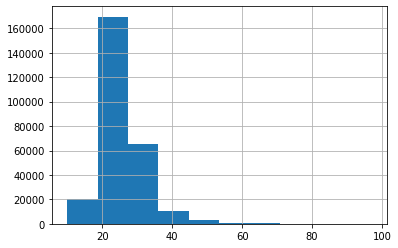

In [67]:
# Looking into age 
data['Age'].hist()

In [68]:
# Most athletes are within 20 to 40
# Let us have four age categories
#   <20, 20-30, 30-40, >40
def get_Age_Category(age):
  if age < 20:
    return '<20'
  elif age < 30 :
    return '20-29'
  elif age < 40:
    return '30-39'
  else:
    return '>=40'
data['Age_Category'] = data.apply(lambda row: get_Age_Category(row['Age']), axis =1)

In [69]:
# Looking into BMI as the fitness measure
def get_BMI(height,weight):
  height = float(height)/100 # converting from cm to metre 
  return (round(weight/(height*height),1))

data['BMI'] = data.apply(lambda row: get_BMI(row['Height'],row['Weight']), axis =1)

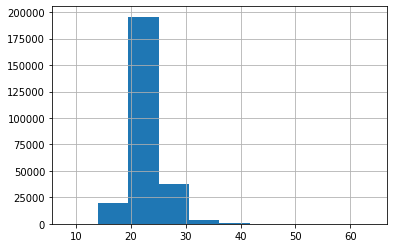

In [70]:
data['BMI'].hist()

In [71]:
# Categorising BMI
# <18.5, 18.5-24.9, 25-29.9, 30-34.9, >35
def get_BMI_Category(BMI):
  if BMI < 18.5:
    return '<18.5'
  elif BMI <= 24.9:
    return '18.5-24.9'
  elif BMI <= 29.9:
    return '25-29.9'
  elif BMI <= 34.9:
    return '30-34.9'
  else:
    return '>35'
data['BMI_Category'] = data.apply(lambda row: get_BMI_Category(row['BMI']), axis =1)

In [72]:
# Outliers?
data[data['BMI']>40]['Event'].unique()
# Mostly Heavyweight events

array(["Weightlifting Women's Super-Heavyweight",
       "Weightlifting Men's Super-Heavyweight",
       "Weightlifting Men's Heavyweight",
       "Wrestling Men's Super-Heavyweight, Greco-Roman",
       "Wrestling Men's Super-Heavyweight, Freestyle",
       'Sailing Mixed Two Person Heavyweight Dinghy',
       'Sailing Mixed Two Person Keelboat', "Judo Men's Heavyweight",
       "Archery Men's Individual", "Judo Women's Heavyweight",
       "Athletics Men's Shot Put", "Athletics Women's Shot Put",
       "Shooting Men's Skeet", "Judo Men's Half-Heavyweight",
       "Weightlifting Men's Heavyweight I",
       "Shooting Women's Air Pistol, 10 metres", "Shooting Men's Trap",
       "Weightlifting Men's Heavyweight II",
       "Athletics Women's Discus Throw", "Bobsleigh Men's Two",
       "Bobsleigh Men's Four", "Judo Men's Half-Middleweight",
       "Table Tennis Women's Singles", "Judo Men's Open Class",
       "Boxing Men's Middleweight", 'Shooting Mixed Trap',
       "Wrestling Men's

In [73]:
data[data['BMI']<20]['Event'].unique()
# Mostly Women's games, Lightweight events and endurance events

array(["Football Women's Football", "Taekwondo Men's Flyweight",
       "Taekwondo Women's Flyweight", "Boxing Men's Flyweight",
       "Boxing Men's Featherweight", "Athletics Women's Marathon",
       "Boxing Men's Lightweight", "Alpine Skiing Men's Giant Slalom",
       "Cycling Women's Road Race, Individual",
       "Taekwondo Women's Featherweight",
       "Athletics Women's 3,000 metres",
       "Synchronized Swimming Women's Duet",
       "Boxing Men's Light-Flyweight",
       "Synchronized Swimming Women's Team",
       "Athletics Men's 5,000 metres", "Athletics Men's 10,000 metres",
       "Athletics Men's Marathon",
       "Swimming Women's 100 metres Backstroke",
       "Swimming Women's 200 metres Backstroke",
       "Swimming Women's 4 x 100 metres Medley Relay",
       "Athletics Men's 400 metres", "Swimming Men's 50 metres Freestyle",
       "Cycling Men's Road Race, Individual",
       "Athletics Women's Long Jump",
       "Wrestling Men's Flyweight, Freestyle",
       

In [74]:
# Cannot ignore outliers as they could represent some special physical characteristics

In [75]:
# Checking Range of BMI in events
bmi_range = data.groupby(['Event']).agg(Min_BMI=('BMI','min'), Max_BMI= ('BMI','max'))

In [76]:
bmi_range['Range']  = bmi_range['Max_BMI'] - bmi_range['Min_BMI']

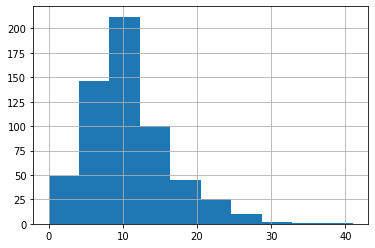

In [77]:
bmi_range['Range'].hist()

In [78]:
bmi_range[bmi_range['Range']>35]

,Min_BMI,Max_BMI,Range
Event,,,
Judo Men's Heavyweight,22.9,63.9,41.0


In [79]:
# The range has varied significantly in some sports
# This could be attributed to changes in the physicalities of the atheletes over the years
#      especially in heavyweight events
# This could mean heavy athletes of different heights 
# Cannot ignore them as outliers as they could contain useful information

In [80]:
# We can ignore only the missing values at this point for the BMI based analysis

In [81]:
data.head()
data.to_csv('finalData.csv')

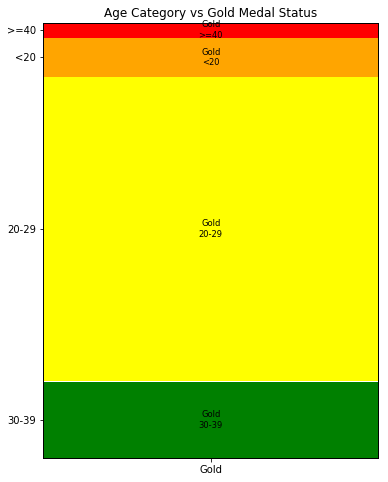

In [82]:
# Age groups and medals
from statsmodels.graphics.mosaicplot import mosaic
def get_color(key):
  if '<20' in key:
    return 'orange'
  elif '20-29' in key:
    return 'yellow'
  elif '30-39' in key:
    return 'green'
  else:
    return 'red'
props = lambda key: {'color': get_color(key)}
datac = data.dropna(axis=0, subset = ['Age'])
data_copy = datac[datac['Medal']=='Gold']
t = mosaic(data_copy, ['Medal','Age_Category'],title='Age Category vs Gold Medal Status',properties=props)
t[0].set_size_inches(6, 8)

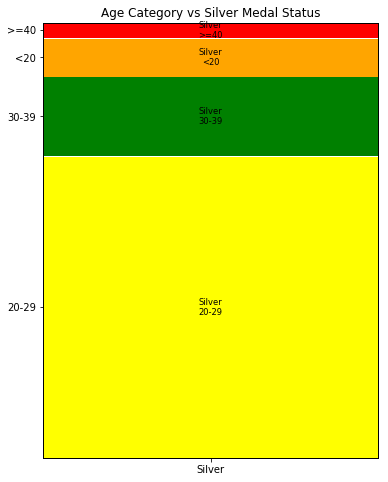

In [83]:
data_copy = datac[datac['Medal']=='Silver']
t = mosaic(data_copy, ['Medal','Age_Category'],title='Age Category vs Silver Medal Status',properties=props)
t[0].set_size_inches(6, 8)

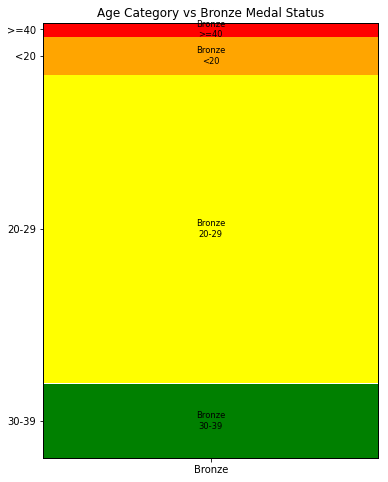

In [84]:
data_copy = datac[datac['Medal']=='Bronze']
t = mosaic(data_copy, ['Medal','Age_Category'],title='Age Category vs Bronze Medal Status',properties=props)
t[0].set_size_inches(6, 8)

In [85]:
ct = pd.crosstab(datac.Medal,datac.Age_Category,margins=True)
ct

Age_Category,20-29,30-39,<20,>=40,All
Medal,,,,,
Bronze,9470,2279,1116,403,13268
Gold,9375,2358,1167,431,13331
None,156449,37563,29092,8176,231280
Silver,9156,2361,1139,432,13088
All,184450,44561,32514,9442,270967


In [86]:
detailCt = ct.copy()
percent_20_29 = np.round(detailCt['20-29']/detailCt.All * 100,decimals=2)
percent_30_39 = np.round(detailCt['30-39']/detailCt.All * 100,decimals=2)
percent_20 = np.round(detailCt['<20']/detailCt.All * 100,decimals=2)
percent_40 = np.round(detailCt['>=40']/detailCt.All * 100,decimals=2)
totalPercent = np.round(detailCt.All/detailCt.All * 100,decimals=2)

detailCt['20-29'] = ct['20-29'].astype('str') + " (" + percent_20_29.astype('str') + "%)"
detailCt['30-39'] = ct['30-39'].astype('str') + " (" + percent_30_39.astype('str') + "%)"
detailCt['<20'] = ct['<20'].astype('str') + " (" + percent_20.astype('str') + "%)"
detailCt['>=40'] = ct['>=40'].astype('str') + " (" + percent_40.astype('str') + "%)"

detailCt.All = ct.All.astype('str') + " (" + totalPercent.astype('str') + "%)"

In [87]:
percent_20_29 + percent_30_39 + percent_20 + percent_40

Medal
Bronze    100.00
Gold       99.99
None      100.00
Silver    100.00
All       100.00
dtype: float64

In [88]:
expected_20_29 = np.round(ct.All * ct.loc['All','20-29']/ct.loc['All','All'], decimals=3) 
expected_30_39 = np.round(ct.All * ct.loc['All','30-39']/ct.loc['All','All'], decimals=3) 
expected_20 = np.round(ct.All * ct.loc['All','<20']/ct.loc['All','All'], decimals=3) 
expected_40 = np.round(ct.All * ct.loc['All','>=40']/ct.loc['All','All'], decimals=3) 
expected_40


Medal
Bronze     462.331
Gold       464.526
None      8059.084
Silver     456.059
All       9442.000
Name: All, dtype: float64

In [89]:
ctExpected = ct.copy()

ctExpected['20-29'] = expected_20_29
ctExpected['30-39'] = expected_30_39
ctExpected['<20'] = expected_20
ctExpected['>=40'] = expected_40

ctExpected['All'] = 0
ctExpected.loc['All'] = 0
ctExpected['All'] = ctExpected.sum(axis=1)
ctExpected.loc['All'] = ctExpected.sum(axis=0)

CtPercent_20_29 = np.round(ctExpected['20-29']/ctExpected.All * 100,decimals=2)
CtPercent_30_39 = np.round(ctExpected['30-39']/ctExpected.All * 100,decimals=2)
CtPercent_20 = np.round(ctExpected['<20']/ctExpected.All * 100,decimals=2)
CtPercent_40 = np.round(ctExpected['>=40']/ctExpected.All * 100,decimals=2)

totalPercent = np.round(ctExpected.All/ctExpected.All * 100,decimals=2)

detailExp = ctExpected.copy()

detailExp['20-29'] = np.round(ctExpected['20-29'],3).astype('str') + " (" + CtPercent_20_29.astype('str') + "%)"
detailExp['30-39'] = np.round(ctExpected['30-39'],3).astype('str') + " (" + CtPercent_30_39.astype('str') + "%)"
detailExp['<20'] = np.round(ctExpected['<20'],3).astype('str') + " (" + CtPercent_20.astype('str') + "%)"
detailExp['>=40'] = np.round(ctExpected['>=40'],3).astype('str') + " (" + CtPercent_40.astype('str') + "%)"

detailExp.All = np.round(ctExpected.All,0).astype('str') + " (" + totalPercent.astype('str') + "%)"

In [90]:
detailExp

Age_Category,20-29,30-39,<20,>=40,All
Medal,,,,,
Bronze,9031.663 (68.07%),2181.946 (16.45%),1592.06 (12.0%),462.331 (3.48%),13268.0 (100.0%)
Gold,9074.548 (68.07%),2192.306 (16.45%),1599.62 (12.0%),464.526 (3.48%),13331.0 (100.0%)
None,157434.654 (68.07%),38034.403 (16.45%),27751.859 (12.0%),8059.084 (3.48%),231280.0 (100.0%)
Silver,8909.135 (68.07%),2152.345 (16.45%),1570.461 (12.0%),456.059 (3.48%),13088.0 (100.0%)
All,184450.0 (68.07%),44561.0 (16.45%),32514.0 (12.0%),9442.0 (3.48%),270967.0 (100.0%)


In [91]:
detailCt

Age_Category,20-29,30-39,<20,>=40,All
Medal,,,,,
Bronze,9470 (71.37%),2279 (17.18%),1116 (8.41%),403 (3.04%),13268 (100.0%)
Gold,9375 (70.32%),2358 (17.69%),1167 (8.75%),431 (3.23%),13331 (100.0%)
None,156449 (67.64%),37563 (16.24%),29092 (12.58%),8176 (3.54%),231280 (100.0%)
Silver,9156 (69.96%),2361 (18.04%),1139 (8.7%),432 (3.3%),13088 (100.0%)
All,184450 (68.07%),44561 (16.45%),32514 (12.0%),9442 (3.48%),270967 (100.0%)


In [120]:
# When it comes to winning medals,
# 20-29 have won more than expected
# All other age groups have won less than expected

# From the mosaic plots,
# In all medal types, particpants in ages 20-29 have won the most medals
# Descending order of more medal wins : 20-29 ,30-39, <20, >=40
# From the crosstab, we notice that the age categories with more medals also have more number of participants

# Check ratio of medals in each age category
datac = data.dropna(axis=0, subset = ['Age'])
detailCt = pd.crosstab(datac.Age_Category,datac.Medal,margins=True)
percent_gold = np.round(detailCt['Gold']/detailCt.All * 100,decimals=2)
percent_silver = np.round(detailCt['Silver']/detailCt.All * 100,decimals=2)
percent_bronze = np.round(detailCt['Bronze']/detailCt.All * 100,decimals=2)
percent_none = np.round(detailCt['None']/detailCt.All * 100,decimals=2)
totalPercent = np.round(detailCt.All/detailCt.All * 100,decimals=2)

detailCt['Gold'] = detailCt['Gold'].astype('str') + " (" + percent_gold.astype('str') + "%)"
detailCt['Silver'] = detailCt['Silver'].astype('str') + " (" + percent_silver.astype('str') + "%)"
detailCt['Bronze'] = detailCt['Bronze'].astype('str') + " (" + percent_bronze.astype('str') + "%)"
detailCt['None'] = detailCt['None'].astype('str') + " (" + percent_none.astype('str') + "%)"

detailCt.All = detailCt.All.astype('str') + " (" + totalPercent.astype('str') + "%)"
detailCt

Medal,Bronze,Gold,None,Silver,All
Age_Category,,,,,
20-29,9470 (5.13%),9375 (5.08%),156449 (84.82%),9156 (4.96%),184450 (100.0%)
30-39,2279 (5.11%),2358 (5.29%),37563 (84.3%),2361 (5.3%),44561 (100.0%)
<20,1116 (3.43%),1167 (3.59%),29092 (89.48%),1139 (3.5%),32514 (100.0%)
>=40,403 (4.27%),431 (4.56%),8176 (86.59%),432 (4.58%),9442 (100.0%)
All,13268 (4.9%),13331 (4.92%),231280 (85.35%),13088 (4.83%),270967 (100.0%)


In [93]:
# From this, we see that in all age categories, ~85% of the athletes didn't win any medals
# So people of the 20-19 age group winning more medals is not special and is because they have a high participant
#    count. If you are a Olympian in the 20-29 age category, your chances of not winning a medal are also near 85% 

In [122]:

# Check ratio of medals in each bmi category
datac = data.dropna(axis=0, subset = ['BMI'])
detailCt = pd.crosstab(datac.BMI_Category,datac.Medal,margins=True)
percent_gold = np.round(detailCt['Gold']/detailCt.All * 100,decimals=2)
percent_silver = np.round(detailCt['Silver']/detailCt.All * 100,decimals=2)
percent_bronze = np.round(detailCt['Bronze']/detailCt.All * 100,decimals=2)
percent_none = np.round(detailCt['None']/detailCt.All * 100,decimals=2)
totalPercent = np.round(detailCt.All/detailCt.All * 100,decimals=2)

detailCt['Gold'] = detailCt['Gold'].astype('str') + " (" + percent_gold.astype('str') + "%)"
detailCt['Silver'] = detailCt['Silver'].astype('str') + " (" + percent_silver.astype('str') + "%)"
detailCt['Bronze'] = detailCt['Bronze'].astype('str') + " (" + percent_bronze.astype('str') + "%)"
detailCt['None'] = detailCt['None'].astype('str') + " (" + percent_none.astype('str') + "%)"

detailCt.All = detailCt.All.astype('str') + " (" + totalPercent.astype('str') + "%)"
detailCt

Medal,Bronze,Gold,None,Silver,All
BMI_Category,,,,,
18.5-24.9,9330 (4.55%),9102 (4.44%),177610 (86.61%),9022 (4.4%),205064 (100.0%)
25-29.9,2288 (5.94%),2323 (6.03%),31647 (82.16%),2261 (5.87%),38519 (100.0%)
30-34.9,216 (4.8%),243 (5.4%),3812 (84.79%),225 (5.0%),4496 (100.0%)
<18.5,323 (3.87%),344 (4.12%),7360 (88.21%),317 (3.8%),8344 (100.0%)
>35,75 (6.13%),54 (4.42%),1029 (84.14%),65 (5.31%),1223 (100.0%)
All,12232 (4.75%),12066 (4.68%),221458 (85.95%),11890 (4.61%),257646 (100.0%)


In [123]:
datac = data[data['Event'].str.contains('Mixed')]
detailCt = pd.crosstab(datac.Sex,datac.Medal,margins=True)
percent_gold = np.round(detailCt['Gold']/detailCt.All * 100,decimals=2)
percent_silver = np.round(detailCt['Silver']/detailCt.All * 100,decimals=2)
percent_bronze = np.round(detailCt['Bronze']/detailCt.All * 100,decimals=2)
percent_none = np.round(detailCt['None']/detailCt.All * 100,decimals=2)
totalPercent = np.round(detailCt.All/detailCt.All * 100,decimals=2)

detailCt['Gold'] = detailCt['Gold'].astype('str') + " (" + percent_gold.astype('str') + "%)"
detailCt['Silver'] = detailCt['Silver'].astype('str') + " (" + percent_silver.astype('str') + "%)"
detailCt['Bronze'] = detailCt['Bronze'].astype('str') + " (" + percent_bronze.astype('str') + "%)"
detailCt['None'] = detailCt['None'].astype('str') + " (" + percent_none.astype('str') + "%)"

detailCt.All = detailCt.All.astype('str') + " (" + totalPercent.astype('str') + "%)"
detailCt

Medal,Bronze,Gold,None,Silver,All
Sex,,,,,
F,129 (4.95%),122 (4.68%),2203 (84.54%),152 (5.83%),2606 (100.0%)
M,610 (4.26%),739 (5.16%),12348 (86.14%),637 (4.44%),14334 (100.0%)
All,739 (4.36%),861 (5.08%),14551 (85.9%),789 (4.66%),16940 (100.0%)


In [94]:
# GENDER
# Selecting only mixed gender events to see if women performance
datac = data[data['Event'].str.contains('Mixed')]

# Observed
ct = pd.crosstab(datac.Medal,datac.Sex,margins=True)
detailCt = ct.copy()
percent_m = np.round(detailCt['M']/detailCt.All * 100,decimals=2)
percent_f = np.round(detailCt['F']/detailCt.All * 100,decimals=2)

totalPercent = np.round(detailCt.All/detailCt.All * 100,decimals=2)

detailCt['M'] = detailCt['M'].astype('str') + " (" + percent_m.astype('str') + "%)"
detailCt['F'] = detailCt['F'].astype('str') + " (" + percent_f.astype('str') + "%)"


detailCt.All = detailCt.All.astype('str') + " (" + totalPercent.astype('str') + "%)"

# Expected
expected_m = np.round(ct.All * ct.loc['All','M']/ct.loc['All','All'], decimals=3) 
expected_f = np.round(ct.All * ct.loc['All','F']/ct.loc['All','All'], decimals=3) 

ctExpected = ct.copy()
ctExpected['M'] = expected_m
ctExpected['F'] = expected_f


ctExpected['All'] = 0
ctExpected.loc['All'] = 0
ctExpected['All'] = ctExpected.sum(axis=1)
ctExpected.loc['All'] = ctExpected.sum(axis=0)

CtPercent_m = np.round(ctExpected['M']/ctExpected.All * 100,decimals=2)
CtPercent_f = np.round(ctExpected['F']/ctExpected.All * 100,decimals=2)


totalPercent = np.round(ctExpected.All/ctExpected.All * 100,decimals=2)

detailExp = ctExpected.copy()

detailExp['M'] = np.round(ctExpected['M'],3).astype('str') + " (" + CtPercent_m.astype('str') + "%)"
detailExp['F'] = np.round(ctExpected['F'],3).astype('str') + " (" + CtPercent_f.astype('str') + "%)"


detailExp.All = np.round(ctExpected.All,0).astype('str') + " (" + totalPercent.astype('str') + "%)"

In [95]:
detailExp

Sex,F,M,All
Medal,,,
Bronze,113.686 (15.38%),625.314 (84.62%),739.0 (100.0%)
Gold,132.454 (15.38%),728.546 (84.62%),861.0 (100.0%)
None,2238.483 (15.38%),12312.517 (84.62%),14551.0 (100.0%)
Silver,121.377 (15.38%),667.623 (84.62%),789.0 (100.0%)
All,2606.0 (15.38%),14334.0 (84.62%),16940.0 (100.0%)


In [96]:
detailCt

Sex,F,M,All
Medal,,,
Bronze,129 (17.46%),610 (82.54%),739 (100.0%)
Gold,122 (14.17%),739 (85.83%),861 (100.0%)
None,2203 (15.14%),12348 (84.86%),14551 (100.0%)
Silver,152 (19.26%),637 (80.74%),789 (100.0%)
All,2606 (15.38%),14334 (84.62%),16940 (100.0%)


In [97]:
# Except for Gold medals, clearly, female athletes have won medals more than expected from the overall stats
# In mixed events, women performed better than expected

In [98]:
# BMI
# Observed
datac = data.dropna(axis=0, subset = ['BMI'])
ct = pd.crosstab(datac.Medal,datac.BMI_Category,margins=True)

detailCt = ct.copy()
percent_one = np.round(detailCt['18.5-24.9']/detailCt.All * 100,decimals=2)
percent_two = np.round(detailCt['>35']/detailCt.All * 100,decimals=2)
percent_three = np.round(detailCt['25-29.9']/detailCt.All * 100,decimals=2)
percent_four = np.round(detailCt['30-34.9']/detailCt.All * 100,decimals=2)
percent_five = np.round(detailCt['<18.5']/detailCt.All * 100,decimals=2)
totalPercent = np.round(detailCt.All/detailCt.All * 100,decimals=2)

detailCt['18.5-24.9'] = ct['18.5-24.9'].astype('str') + " (" + percent_one.astype('str') + "%)"
detailCt['>35'] = ct['>35'].astype('str') + " (" + percent_two.astype('str') + "%)"
detailCt['25-29.9'] = ct['25-29.9'].astype('str') + " (" + percent_three.astype('str') + "%)"
detailCt['30-34.9'] = ct['30-34.9'].astype('str') + " (" + percent_four.astype('str') + "%)"
detailCt['<18.5'] = ct['<18.5'].astype('str') + " (" + percent_five.astype('str') + "%)"

detailCt.All = ct.All.astype('str') + " (" + totalPercent.astype('str') + "%)"

In [99]:
expected_one = np.round(ct.All * ct.loc['All','18.5-24.9']/ct.loc['All','All'], decimals=3) 
expected_two = np.round(ct.All * ct.loc['All','>35']/ct.loc['All','All'], decimals=3) 
expected_three = np.round(ct.All * ct.loc['All','25-29.9']/ct.loc['All','All'], decimals=3) 
expected_four = np.round(ct.All * ct.loc['All','30-34.9']/ct.loc['All','All'], decimals=3) 
expected_five = np.round(ct.All * ct.loc['All','<18.5']/ct.loc['All','All'], decimals=3) 

ctExpected = ct.copy()

ctExpected['18.5-24.9'] = expected_one
ctExpected['>35'] = expected_two
ctExpected['25-29.9'] = expected_three
ctExpected['30-34.9'] = expected_four
ctExpected['<18.5'] = expected_five

ctExpected['All'] = 0
ctExpected.loc['All'] = 0
ctExpected['All'] = ctExpected.sum(axis=1)
ctExpected.loc['All'] = ctExpected.sum(axis=0)

CtPercent_one = np.round(ctExpected['18.5-24.9']/ctExpected.All * 100,decimals=2)
CtPercent_two = np.round(ctExpected['>35']/ctExpected.All * 100,decimals=2)
CtPercent_three = np.round(ctExpected['25-29.9']/ctExpected.All * 100,decimals=2)
CtPercent_four = np.round(ctExpected['30-34.9']/ctExpected.All * 100,decimals=2)
CtPercent_five = np.round(ctExpected['<18.5']/ctExpected.All * 100,decimals=2)

totalPercent = np.round(ctExpected.All/ctExpected.All * 100,decimals=2)

detailExp = ctExpected.copy()

detailExp['18.5-24.9'] = np.round(ctExpected['18.5-24.9'],3).astype('str') + " (" + CtPercent_one.astype('str') + "%)"
detailExp['>35'] = np.round(ctExpected['>35'],3).astype('str') + " (" + CtPercent_two.astype('str') + "%)"
detailExp['25-29.9'] = np.round(ctExpected['25-29.9'],3).astype('str') + " (" + CtPercent_three.astype('str') + "%)"
detailExp['30-34.9'] = np.round(ctExpected['30-34.9'],3).astype('str') + " (" + CtPercent_four.astype('str') + "%)"
detailExp['<18.5'] = np.round(ctExpected['<18.5'],3).astype('str') + " (" + CtPercent_five.astype('str') + "%)"

detailExp.All = np.round(ctExpected.All,0).astype('str') + " (" + totalPercent.astype('str') + "%)"


In [100]:
detailExp

BMI_Category,18.5-24.9,25-29.9,30-34.9,<18.5,>35,All
Medal,,,,,,
Bronze,9735.617 (79.59%),1828.728 (14.95%),213.452 (1.75%),396.14 (3.24%),58.063 (0.47%),12232.0 (100.0%)
Gold,9603.496 (79.59%),1803.91 (14.95%),210.555 (1.75%),390.764 (3.24%),57.275 (0.47%),12066.0 (100.0%)
None,176261.472 (79.59%),33108.764 (14.95%),3864.509 (1.75%),7172.033 (3.24%),1051.222 (0.47%),221458.0 (100.0%)
Silver,9463.415 (79.59%),1777.598 (14.95%),207.484 (1.75%),385.064 (3.24%),56.44 (0.47%),11890.0 (100.0%)
All,205064.0 (79.59%),38519.0 (14.95%),4496.0 (1.75%),8344.001 (3.24%),1223.0 (0.47%),257646.0 (100.0%)


In [101]:
detailCt

BMI_Category,18.5-24.9,25-29.9,30-34.9,<18.5,>35,All
Medal,,,,,,
Bronze,9330 (76.28%),2288 (18.71%),216 (1.77%),323 (2.64%),75 (0.61%),12232 (100.0%)
Gold,9102 (75.44%),2323 (19.25%),243 (2.01%),344 (2.85%),54 (0.45%),12066 (100.0%)
None,177610 (80.2%),31647 (14.29%),3812 (1.72%),7360 (3.32%),1029 (0.46%),221458 (100.0%)
Silver,9022 (75.88%),2261 (19.02%),225 (1.89%),317 (2.67%),65 (0.55%),11890 (100.0%)
All,205064 (79.59%),38519 (14.95%),4496 (1.75%),8344 (3.24%),1223 (0.47%),257646 (100.0%)


In [102]:
# In almost all medal categories, the 18.5 - 24.9 BMI category which is usually considered as the ideal,
#    won less medals than expected
# But first, we can see that a vast majority of the participating atheletes fall in this range of ideal BMI

In [117]:
# Chi square test to test significance
from scipy.stats import chi2_contingency
datac = data.dropna(axis=0, subset = ['BMI'])
# Setting medal column as medallist or non medallist status
datac['Medal'] = datac['Medal'].apply(lambda x: 'No' if x=='None' else 'Yes')
print('Chi test for BMI Category vs Medallist status')

ct = pd.crosstab(datac.Medal,datac.BMI_Category,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Overall: ')
print("p-val = ", p)

data_selected = datac[datac['Category']=='Athletic']
ct = pd.crosstab(data_selected.Medal,data_selected.BMI_Category,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Athletic sports category: ')
print("p-val = ", p)

data_selected = datac[datac['Category']=='Combative']
ct = pd.crosstab(data_selected.Medal,data_selected.BMI_Category,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Combative sports category: ')
print("p-val = ", p)

data_selected = datac[datac['Category']=='Ball based']
ct = pd.crosstab(data_selected.Medal,data_selected.BMI_Category,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Ball based sports category: ')
print("p-val = ", p)

data_selected = datac[datac['Category']=='Other']
ct = pd.crosstab(data_selected.Medal,data_selected.BMI_Category,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Other sports category: ')
print("p-val = ", p)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Chi test for BMI Category vs Medallist status
Overall: 
p-val =  1.9636111801537638e-117
Athletic sports category: 
p-val =  8.771155033477955e-63
Combative sports category: 
p-val =  0.04758128226905475
Ball based sports category: 
p-val =  6.940574306111892e-31
Other sports category: 
p-val =  0.006543055332800753


p-value < 0.5. Reject H0 in all cases. <br>
Relationship present between BMI category and the medallist status

In [118]:
# Age
print('Chi test for Age Category vs Medallist status')
datac = data.dropna(axis=0, subset = ['Age'])
ct = pd.crosstab(datac.Medal,datac.Age_Category,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Overall: ')
print("p-val = ", p)

data_selected = datac[datac['Category']=='Athletic']
ct = pd.crosstab(data_selected.Medal,data_selected.Age_Category,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Athletic sports category: ')
print("p-val = ", p)

data_selected = datac[datac['Category']=='Combative']
ct = pd.crosstab(data_selected.Medal,data_selected.Age_Category,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Combative sports category: ')
print("p-val = ", p)

data_selected = datac[datac['Category']=='Ball based']
ct = pd.crosstab(data_selected.Medal,data_selected.Age_Category,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Ball based sports category: ')
print("p-val = ", p)

data_selected = datac[datac['Category']=='Other']
ct = pd.crosstab(data_selected.Medal,data_selected.Age_Category,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Other sports category: ')
print("p-val = ", p)

Chi test for Age Category vs Medallist status
Overall: 
p-val =  3.0693107469444077e-105
Athletic sports category: 
p-val =  3.0542458624801927e-28
Combative sports category: 
p-val =  0.0024394961531481237
Ball based sports category: 
p-val =  1.1619490651324925e-05
Other sports category: 
p-val =  8.774104749118796e-39


p-value less than 0.5. Reject H0 in all cases.<br> Hence, there is a significant relationship between the medals and the age categories.




In [119]:
# GENDER
# Selecting only mixed gender events to see if women performance
datac = data[data['Event'].str.contains('Mixed')]
print('Chi test for Sex vs Medallist status')
ct = pd.crosstab(datac.Medal,datac.Sex,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Overall: ')
print("p-val = ", p)

data_selected = datac[datac['Category']=='Athletic']
ct = pd.crosstab(data_selected.Medal,data_selected.Sex,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Athletic sports category: ')
print("p-val = ", p)

# No mixed combative sports
# data_selected = datac[datac['Category']=='Combative']
# ct = pd.crosstab(data_selected.Medal,data_selected.Sex,margins=True)
# chi2, p, dof, ex = chi2_contingency(ct)
# print('Combative sports category: ')
# print("p-val = ", p)

data_selected = datac[datac['Category']=='Ball based']
ct = pd.crosstab(data_selected.Medal,data_selected.Sex,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Ball based sports category: ')
print("p-val = ", p)

data_selected = datac[datac['Category']=='Other']
ct = pd.crosstab(data_selected.Medal,data_selected.Sex,margins=True)
chi2, p, dof, ex = chi2_contingency(ct)
print('Other sports category: ')
print("p-val = ", p)

Chi test for Sex vs Medallist status
Overall: 
p-val =  0.1048833826019914
Athletic sports category: 
p-val =  0.10588264625870755
Ball based sports category: 
p-val =  1.0
Other sports category: 
p-val =  0.19664760829257932


In [114]:
datac['Category'].unique()

array(['Other', 'Athletic', 'Ball based'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


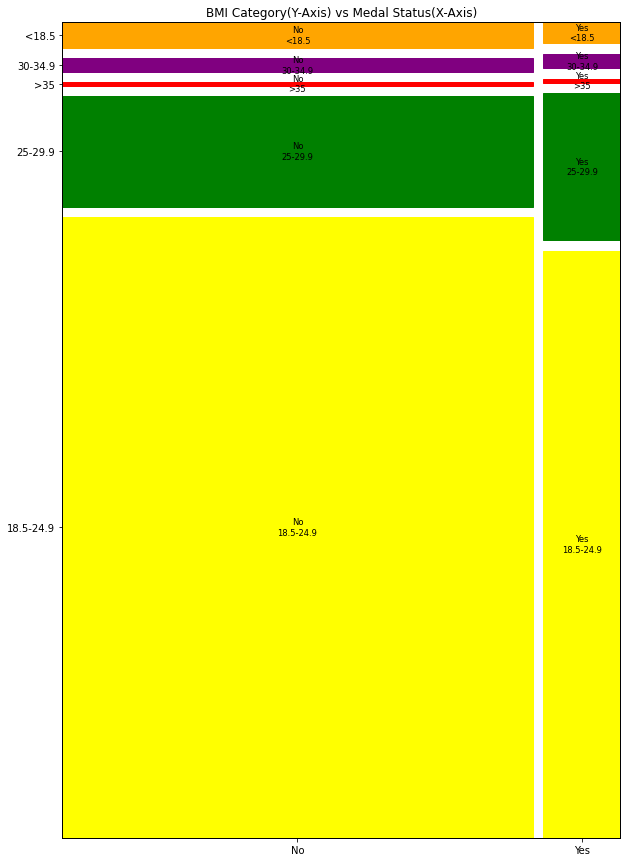

In [106]:
# Age groups and medals
from statsmodels.graphics.mosaicplot import mosaic

datac = data.dropna(axis=0, subset = ['BMI'])
datac['Medal'] = datac['Medal'].apply(lambda x: 'No' if x=='None' else 'Yes')
def get_color(key):
  if '<18.5' in key:
    return 'orange'
  elif '18.5-24.9' in key:
    return 'yellow'
  elif '25-29.9' in key:
    return 'green'
  elif '30-34.9' in key:
    return 'purple'
  else:
    return 'red'
props = lambda key: {'color': get_color(key)}
t = mosaic(datac, ['Medal','BMI_Category'],title='BMI Category(Y-Axis) vs Medal Status(X-Axis)',properties=props,gap=0.02)
t[0].set_size_inches(10, 15)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


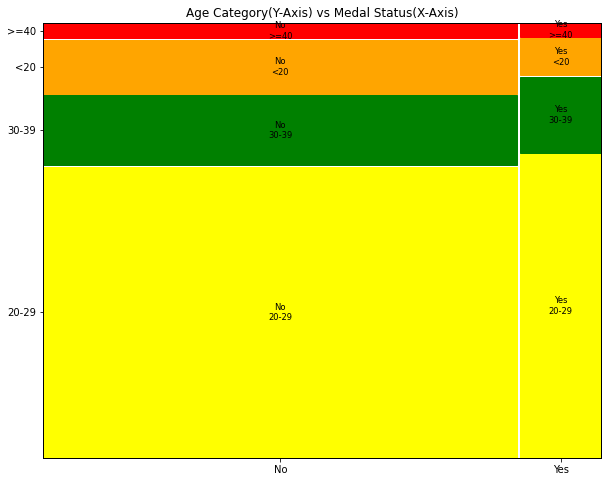

In [109]:
# Age groups and medals
from statsmodels.graphics.mosaicplot import mosaic
def get_color(key):
  if '<20' in key:
    return 'orange'
  elif '20-29' in key:
    return 'yellow'
  elif '30-39' in key:
    return 'green'
  else:
    return 'red'
props = lambda key: {'color': get_color(key)}
datac = data.dropna(axis=0, subset = ['Age'])
datac['Medal'] = datac['Medal'].apply(lambda x: 'No' if x=='None' else 'Yes')
t = mosaic(datac, ['Medal','Age_Category'],title='Age Category(Y-Axis) vs Medal Status(X-Axis)',properties=props)
t[0].set_size_inches(10, 8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


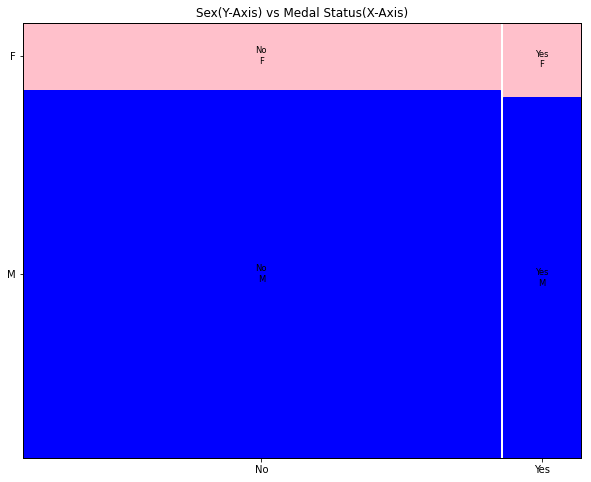

In [116]:
# Gender and medals
from statsmodels.graphics.mosaicplot import mosaic
def get_color(key):
  if 'M' in key:
    return 'blue'
  else:
    return 'pink'
props = lambda key: {'color': get_color(key)}
datac = data[data['Event'].str.contains('Mixed')]
datac['Medal'] = datac['Medal'].apply(lambda x: 'No' if x=='None' else 'Yes')
t = mosaic(datac, ['Medal','Sex'],title='Sex(Y-Axis) vs Medal Status(X-Axis)',properties=props)
t[0].set_size_inches(10, 8)